In [19]:
import requests
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\diksh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diksh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [20]:
#Function to get HTML content from a URL 
def get_html_content(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        print(f"Failed to retrieve content. Status code: {response.status_code}")
        return None

In [21]:
#Function to extract text content from HTML using BeautifulSoup
def extract_text(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    paragraphs = soup.find_all('p')
    text=''.join([paragraph.get_text() for paragraph in paragraphs])
    return text

In [22]:

#Frequncy to tokenize and analyze word frequency
def analyze_word_frequency(text):
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
    # Calculate word frequency distribution
    freq_dist = FreqDist(filtered_tokens)
    return freq_dist

In [23]:
#Function to plot word frequency distribution
def plot_word_frequency(freq_dist):
    freq_dist.plot(20, cumulative=False)
    plt.show()

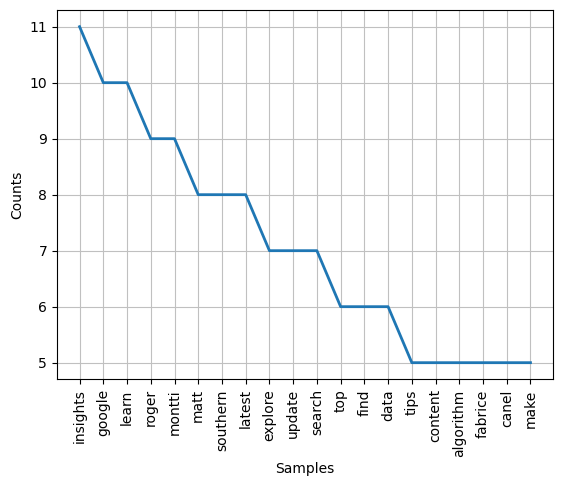

In [24]:
if __name__ == "__main__":
# Replace 'https://example.com' with the URL you want to mine
    target_url = 'https://www.searchenginejournal.com'

# Step 1: Get HTML content
    html_content = get_html_content(target_url)
    if html_content:
    #Step 2: Extract text content 
        extracted_text = extract_text(html_content)
        
    # Step 3: Analyze word frequncy
        word_frequency = analyze_word_frequency(extracted_text)
        plot_word_frequency(word_frequency)